# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from unityagents import UnityEnvironment
from collections import deque
import numpy as np
import torch
import my_agent
#from ddpg_agent import Agent as ud_agent
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
#env = UnityEnvironment(file_name='C:/Users/pr8745/ud/deep-reinforcement-learning/p2_continuous-control/Reacher_Windows_x86_64_1agent/Reacher.exe')
env = UnityEnvironment(file_name='C:/Users/pr8745/ud/deep-reinforcement-learning/p2_continuous-control/Reacher_Windows_x86_64_20agents/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

state_sz = brain.vector_observation_space_size
action_sz = brain.vector_action_space_size
#my_agents = [my_agent.my_ddpg_agent(state_sz,action_sz,1,-1) for i in range(num_agents)]
#ud_agents = [ud_agent.Agent(state_sz,action_sz,1) for i in range(num_agents)]
#agent = ud_agent(state_sz,action_sz,1)
agent = my_agent.my_ddpg_agent(state_sz,action_sz,1,-1)
scores = []
scores_deque = deque(maxlen=100)

In [7]:
for x in range(200):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    score = np.zeros(num_agents)
    agent.reset()
    while True:
        actions = [agent.act(state) for state in states]
        #action = agent.act(state)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        score += env_info.rewards
        #for i in range(num_agents):
            #agents[i].learn_from_env_response(states[i], actions[i], next_states[i], rewards[i], dones[i])
        for i in range(num_agents):
            agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i])
        states = next_states
        if any(dones):
            break
    scores.append(score)
    with open('agent_scores.py','a') as scores_fl:
        scores_fl.write(repr(list(score)))
        scores_fl.write("\n")
    scores_deque.append(score)
    if( x%10 == 0):
        torch.save(agent.actor_m.state_dict(), 'actor_checkpoint.pth')
        torch.save(agent.critic_m.state_dict(), 'critic_checkpoint.pth')
        #torch.save(agent.actor_local.state_dict(), 'actor_checkpoint.pth')
        #torch.save(agent.critic_local.state_dict(), 'critic_checkpoint.pth')
        
        print("Episode {}\t Average Score: {}".format(x,np.mean(scores_deque)))

C:\Users\pr8745\ud\deep-reinforcement-learning\p2_continuous-control\my_agent.py:176: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_m.parameters(), 1)


Episode 0	 Average Score: 0.716499983984977
Episode 10	 Average Score: 0.9683181601745838
Episode 20	 Average Score: 1.2403571151330002
Episode 30	 Average Score: 1.5274838368258168
Episode 40	 Average Score: 2.538414577408353
Episode 50	 Average Score: 5.677568500547433
Episode 60	 Average Score: 10.282942393109142
Episode 70	 Average Score: 14.196696865777682
Episode 80	 Average Score: 17.23047492351084
Episode 90	 Average Score: 19.61815340765394
Episode 100	 Average Score: 21.735724514168687
Episode 110	 Average Score: 25.538699429165572
Episode 120	 Average Score: 29.283134345470927
Episode 130	 Average Score: 32.99457426251378
Episode 140	 Average Score: 36.3589241873147
Episode 150	 Average Score: 38.41144914143719
Episode 160	 Average Score: 38.91215913024545
Episode 170	 Average Score: 38.960214129171334
Episode 180	 Average Score: 38.90632413037587
Episode 190	 Average Score: 38.8352141319653


We trained the agent. Lets see plot for average score by each episode!

No of episodes completed:  200


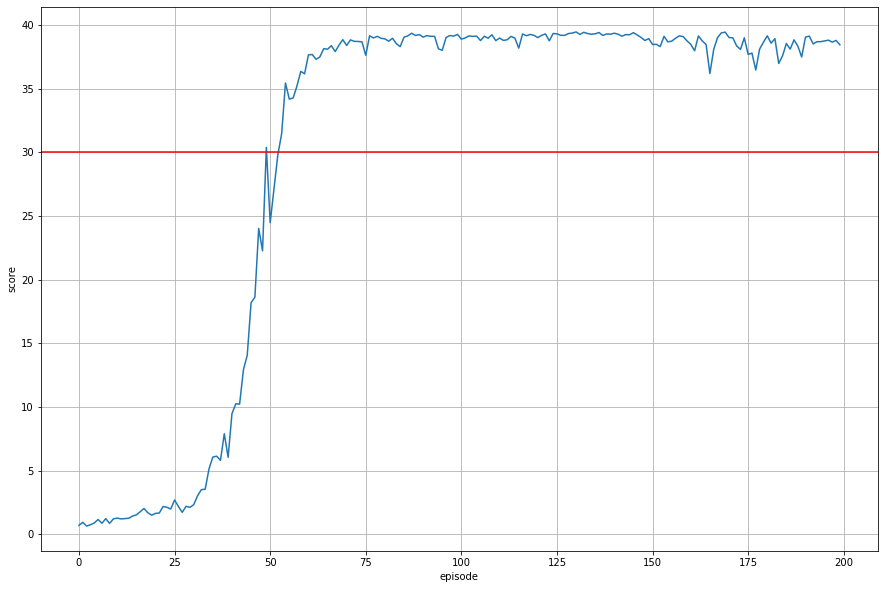

In [9]:
scores_mean = [np.mean(a) for a in scores]
print("No of episodes completed: ", len(scores_mean))
plt.figure(figsize=(15,10))
plt.plot(scores_mean)
plt.axhline(y=30, color='r')
plt.ylabel('score')
plt.xlabel('episode')
plt.grid(True)

In [32]:
np.mean(scores_mean[23:123])

30.0293593287915

In [34]:
scores_mean[50:60]

[24.476999452896415,
 27.128499393630772,
 29.808499333728104,
 31.4619992967695,
 35.4489992076531,
 34.18449923591688,
 34.271999233961104,
 35.20899921301752,
 36.362999187223615,
 36.170499191526325]

### We got a 100-episode-average-score of >30 at episode 123. So the environment was solved in 23 episodes.

After episode 53, the agent achieved a >35 score consistently

Saving the agents actor and critic models to files.

In [15]:
torch.save({'state_dict':agent.actor_m.state_dict()},'my_actor.200.pth')
torch.save({'state_dict':agent.critic_m.state_dict()},'my_critic.200.pth')

### Evaluation time!
Lets create a eval agent. Load the actor and critic models from the saved files

In [17]:
eval_agent = my_agent.my_ddpg_agent(state_sz,action_sz,1,-1)
sd = torch.load('my_actor.200.pth')['state_dict']
eval_agent.actor_m.load_state_dict(sd)
sd = torch.load('my_critic.200.pth')['state_dict']
eval_agent.critic_m.load_state_dict(sd)

In [28]:
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations
score = np.zeros(num_agents)
eval_agent.actor_m.eval()
eval_agent.critic_m.eval()
while True:
    actions = [eval_agent.act(state,train_mode=False) for state in states]
    env_info = env.step(actions)[brain_name]
    next_states = env_info.vector_observations
    rewards = env_info.rewards
    dones = env_info.local_done
    score += env_info.rewards
    #for i in range(num_agents):
    #    agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i])
    states = next_states
    if any(dones):
        break
print("Scores of the individual agents: ",score)
print("Average score: ",score.mean())

Scores of the individual agents:  [39.40999912 39.45999912 39.57999912 37.53999916 37.35999916 39.66999911
 39.59999911 39.58999912 39.53999912 39.58999912 39.58999912 39.52999912
 39.50999912 39.31999912 39.48999912 39.44999912 39.58999912 39.34999912
 35.31999921 39.56999912]
Average score:  39.10299912597984


### We achieved an average score of +39 across all 20 agents!!